In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-dataset-of-retailstore/NEWRetaildatasetofGRIPFEB023.csv


# **#  Task - 3
# **# Exploratory Data Analysis - Retail Store****

# here we are finding some questions answer as follows:

# Que1 - Trying to find some weak areas where we can make profits
# Que2 - we are finding business problem by exploring this data


> **We are importing some libraries :**

In [2]:
import pandas as pd 

In [3]:
# reading dataset
df = pd.read_csv("/kaggle/input/new-dataset-of-retailstore/NEWRetaildatasetofGRIPFEB023.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Subclass-Category,Sales,Quantity,Discounts,Profits
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Subclass-Category,Sales,Quantity,Discounts,Profits
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
df.shape

(9994, 13)

In [7]:
df.Category

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
9989          Furniture
9990          Furniture
9991         Technology
9992    Office Supplies
9993    Office Supplies
Name: Category, Length: 9994, dtype: object

In [8]:
# Getting Information of data or we can say insight 

df.describe()

,Postal Code,Sales,Quantity,Discounts,Profits
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Deleting unwanted columns : 

In [10]:
df = df.drop(columns = 'Postal Code')

In [11]:
# We are checking again for data as we now remove the unwanted columns

df.describe()

,Sales,Quantity,Discounts,Profits
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [12]:
df.duplicated().sum() # Finding Duplicate values


50

In [13]:
df.drop_duplicates() # Removing Duplicates value

,Ship Mode,Segment,Country,City,State,Region,Category,Subclass-Category,Sales,Quantity,Discounts,Profits
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [14]:
df.shape # Here we are finding our new shape

(9994, 12)

In [15]:
# Now we are looking for null values :

In [16]:
df.isnull().sum()

Ship Mode            0
Segment              0
Country              0
City                 0
State                0
Region               0
Category             0
Subclass-Category    0
Sales                0
Quantity             0
Discounts            0
Profits              0
dtype: int64

In [17]:
# by looking this we get to know that there is no null value

In [18]:
# Now we looking for info of this data by taking help of info function of pandas 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship Mode          9994 non-null   object 
 1   Segment            9994 non-null   object 
 2   Country            9994 non-null   object 
 3   City               9994 non-null   object 
 4   State              9994 non-null   object 
 5   Region             9994 non-null   object 
 6   Category           9994 non-null   object 
 7   Subclass-Category  9994 non-null   object 
 8   Sales              9994 non-null   float64
 9   Quantity           9994 non-null   int64  
 10  Discounts          9994 non-null   float64
 11  Profits            9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [19]:
# we are now checking Data Types in given dataset:


In [20]:
df.dtypes

Ship Mode             object
Segment               object
Country               object
City                  object
State                 object
Region                object
Category              object
Subclass-Category     object
Sales                float64
Quantity               int64
Discounts            float64
Profits              float64
dtype: object

In [21]:
# Now we visualize data 

In [22]:
# we are importing libraries for graph purpose
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Category', ylabel='count'>

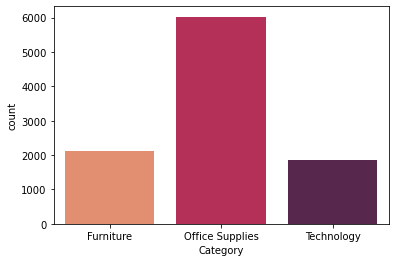

In [23]:
sns.countplot(x = 'Category',data = df,palette = 'rocket_r') #here we getting categories of things store sells

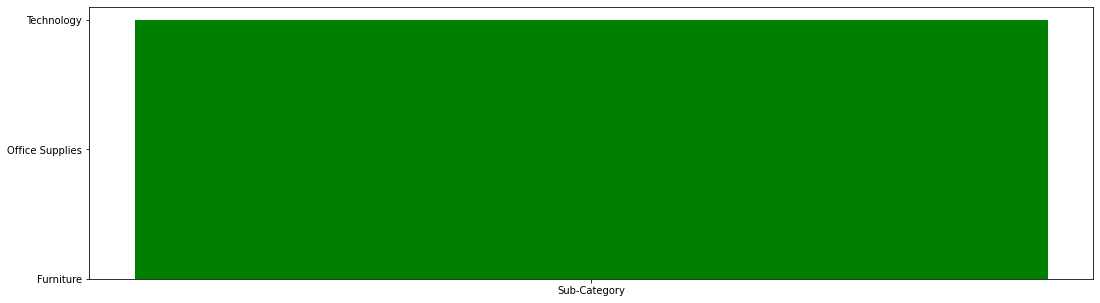

In [24]:
plt.figure(figsize=(18,5))
plt.bar('Sub-Category','Category', data=df,color = 'Green')
plt.show() # here we getting sub- category

In [25]:
# here we getting to know that in furniture business very less things we sell

# for getting breif knowledge of sub-category we will make another graph:

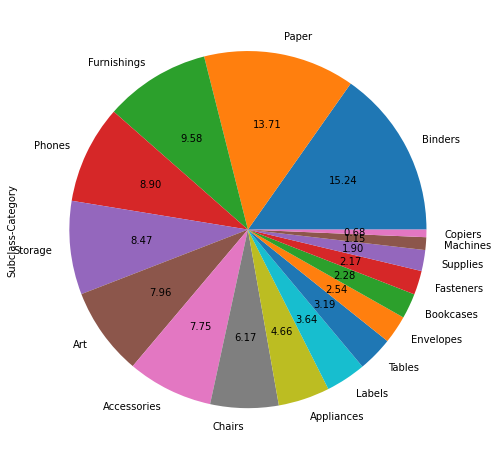

In [26]:
plt.figure(figsize = (8,10))
df['Subclass-Category'].value_counts().plot.pie(autopct = '%.2f')
plt.show()

**Observations:**

*  From above we get to know Blinders,Paper, Furnishings, Phones, storage, art, accessories we sell at large.
*  And we sell very minimum things like Copiers,Machine & suppliers

In [27]:
df.State.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [28]:
df.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [29]:
df.head(10)


,Ship Mode,Segment,Country,City,State,Region,Category,Subclass-Category,Sales,Quantity,Discounts,Profits
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [30]:
df.City.unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [31]:
# For understanding segment 

<AxesSubplot:xlabel='Segment', ylabel='count'>

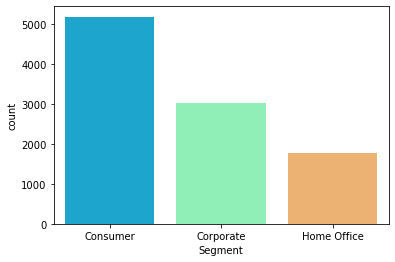

In [32]:
sns.countplot(x = 'Segment',data = df,palette = 'rainbow')

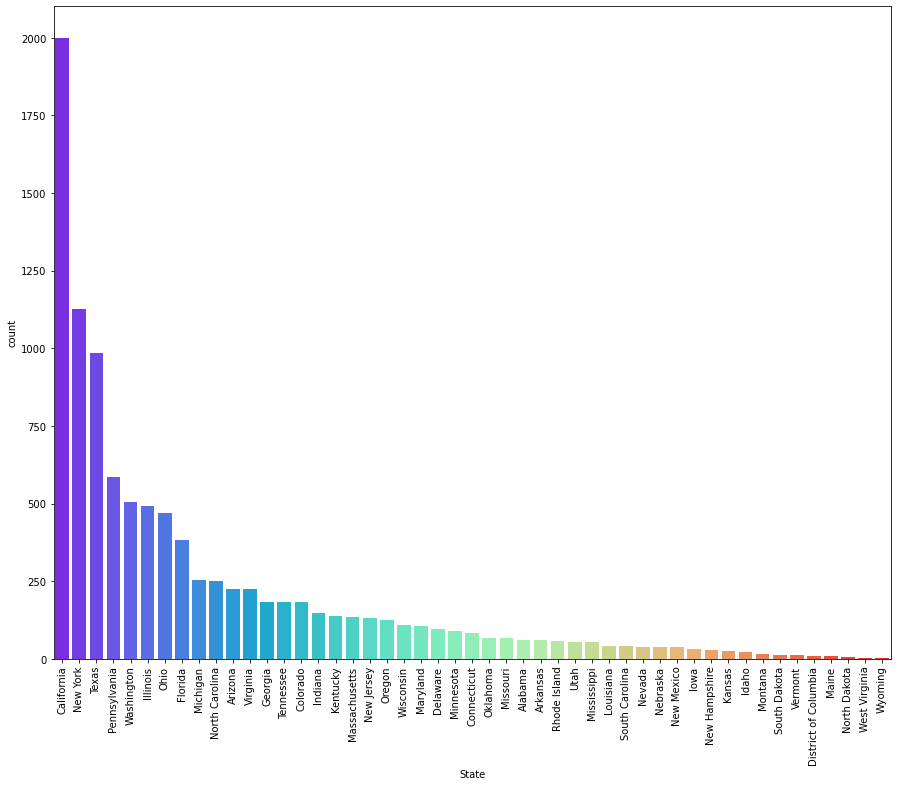

In [33]:
plt.figure(figsize = (15,12))
sns.countplot(x = 'State', data = df, palette = 'rainbow',order = df["State"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

**Observations:**

From above two we get to know that :
* Highest No of buyers are from California,NewYork and Texas
* lowest no of buyers are from West Virgnia and Wyoming
* we deal with Consumer segment more as compared to other Corporate and  Home office

<AxesSubplot:xlabel='Region', ylabel='count'>

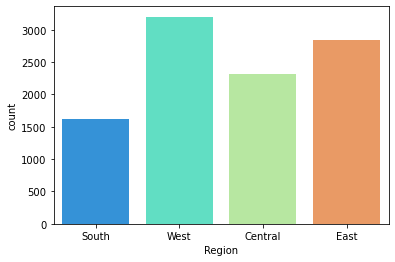

In [34]:
sns.countplot(x = 'Region',data = df,palette = 'rainbow')

**Observation:**

from here we getting to know that store sell mainly in West & East region

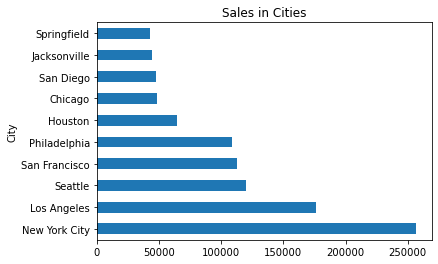

In [35]:
total_sales = df.groupby('City')['Sales'].sum()
top_10_city_sales = total_sales.sort_values(ascending = False).iloc[0:10]
top_10_city_sales.plot(kind = 'barh')
plt.title ('Sales in Cities')
plt.show()

**Observation:**

Here we get to know that store sell most things to City like NewYork,Los Angeles,Seattle

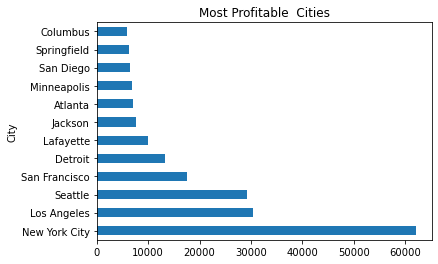

In [36]:
total_profit = df.groupby('City')['Profits'].sum()
top_10_profit = total_profit.sort_values(ascending = False).iloc[0:12]
top_10_profit.plot(kind = 'barh')
plt.title ('Most Profitable  Cities')
plt.show()


**Observations:**

Here we get to know Most profitable cities for store is NewYork,Los Angeles,Seattle

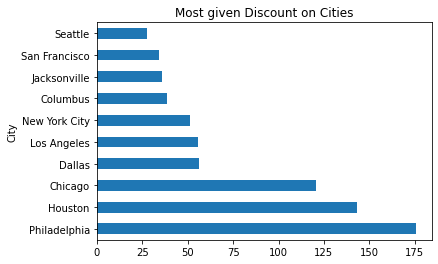

In [37]:
totalDiscount = df.groupby('City')['Discounts'].sum()
top_10_Dis = totalDiscount.sort_values(ascending = False).iloc[0:10]
top_10_Dis.plot(kind = 'barh') 
plt.title('Most given Discount on Cities')
plt.show()

**Observations:**

Here we get to know that we give more discount to cities like Philadelphia, Houston and Chicago

We analyze now region column on the basis of shipment mode:

<Figure size 1296x864 with 0 Axes>

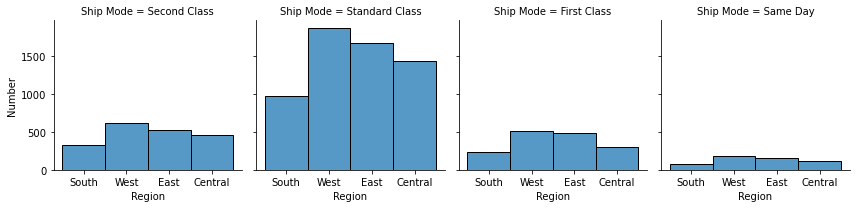

In [38]:
plt.figure(figsize = (18,12))
region_ship = sns.FacetGrid(df, col = 'Ship Mode')
region_ship.map(sns.histplot,'Region')
region_ship.set_ylabels('Number')
plt.show()

**Observations:**

central region people mostly use second class and standard class mode of shipment
Were as West region people prefer First Class & Same Day ship mode mostly.

<Figure size 1080x1080 with 0 Axes>

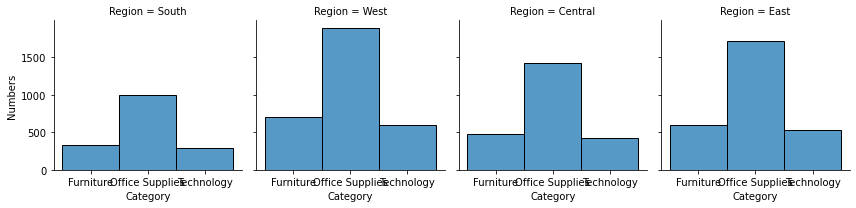

In [39]:
plt.figure(figsize = (15,15))
category = sns.FacetGrid(df, col = 'Region')
category.map(sns.histplot, 'Category')
category.set_ylabels("Numbers")

**Observations:**

* On South region store mostly sell Office Supplies.
* On West region store mostly sell Furnitures.
* On Central region store mostly sell Furnitures.
* on East region store mostly sell Office Supplies.

<Figure size 1080x1080 with 0 Axes>

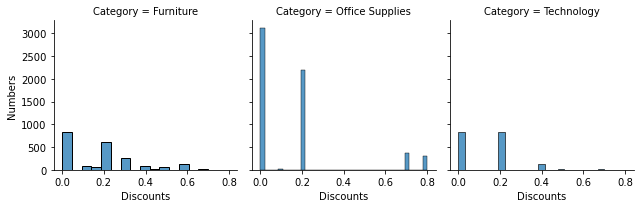

In [40]:
plt.figure(figsize = (15,15))
Discount = sns.FacetGrid(df, col = 'Category')
Discount.map(sns.histplot,'Discounts')
Discount.set_ylabels("Numbers")

<Figure size 1080x1080 with 0 Axes>

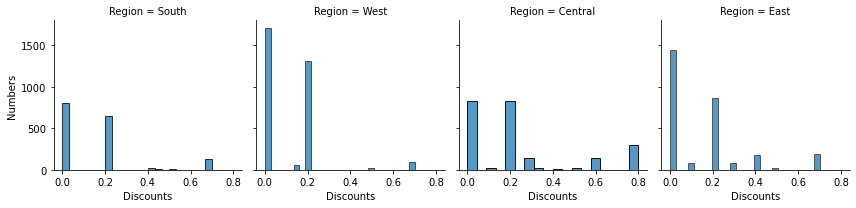

In [41]:
plt.figure(figsize = (15,15))
Discount = sns.FacetGrid(df, col = 'Region')
Discount.map(sns.histplot,'Discounts')
Discount.set_ylabels("Numbers")

<Figure size 864x792 with 0 Axes>

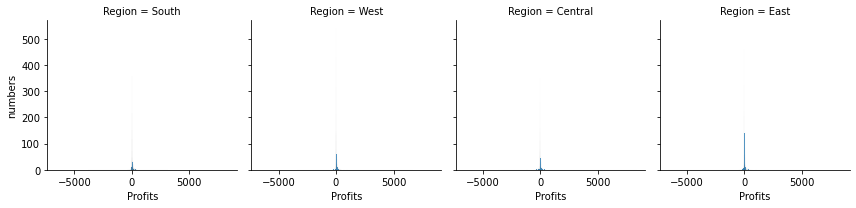

In [42]:
plt.figure(figsize = (12,11))
profitdf = sns.FacetGrid(df,col = 'Region')
profitdf.map(sns.histplot,'Profits')
profitdf.set_ylabels("numbers")
plt.show()

<Figure size 864x864 with 0 Axes>

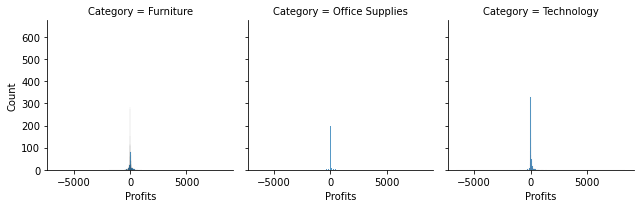

In [43]:
plt.figure(figsize= (12,12))
profit_ = sns.FacetGrid(df,col = 'Category')
profit_.map(sns.histplot,'Profits')
profit_set_ylabels = 'Numbers'
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='State'>

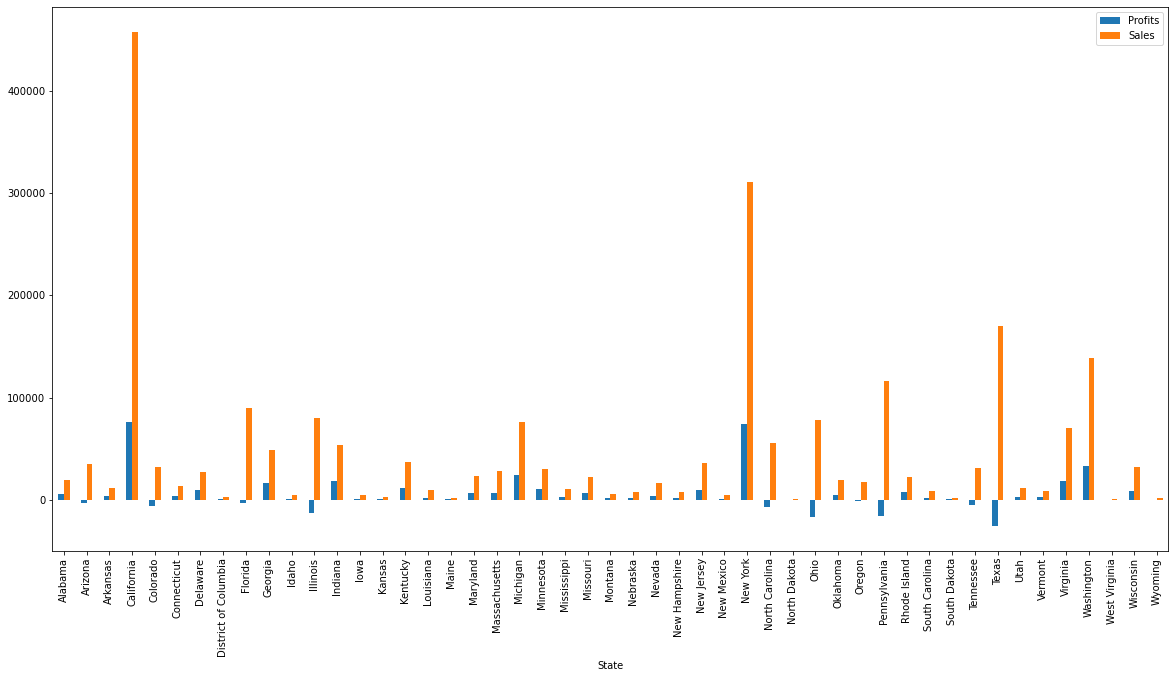

In [44]:
category = df.groupby("State")["Profits", "Sales"].sum()
category.plot.bar(figsize=(20,10))

<Figure size 864x864 with 0 Axes>

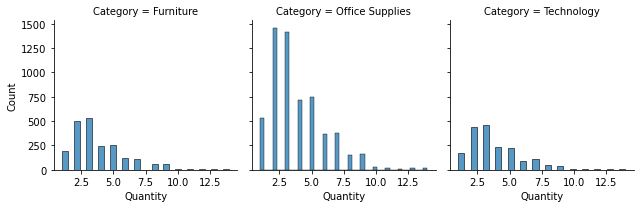

In [45]:
plt.figure(figsize = (12,12))
quan = sns.FacetGrid(df,col = 'Category')
quan.map(sns.histplot,"Quantity")
quan_set_labels = 'Numbers'
plt.show()

Text(0.5, 1.0, 'Sub Category Wise Sales')

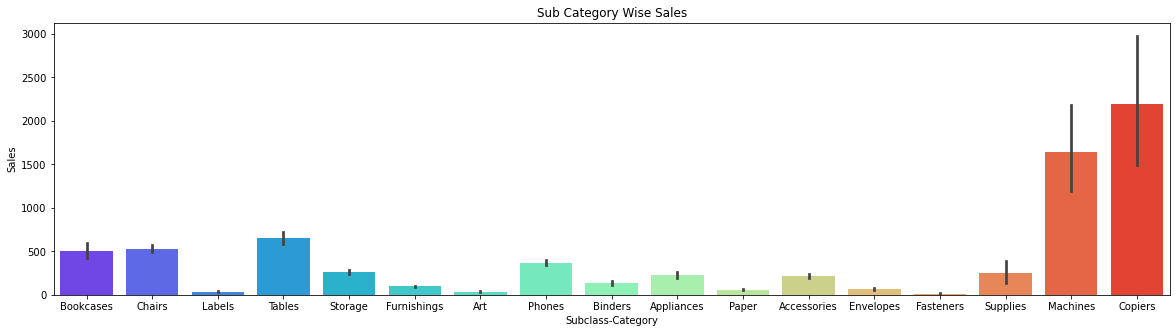

In [46]:
plt.figure(figsize=(20,5))
sns.barplot(x='Subclass-Category',y='Sales', data=df, palette = 'rainbow')
plt.title('Sub Category Wise Sales')

(array([0, 1, 2]),
 [Text(0, 0, 'Furniture'),
  Text(1, 0, 'Office Supplies'),
  Text(2, 0, 'Technology')])

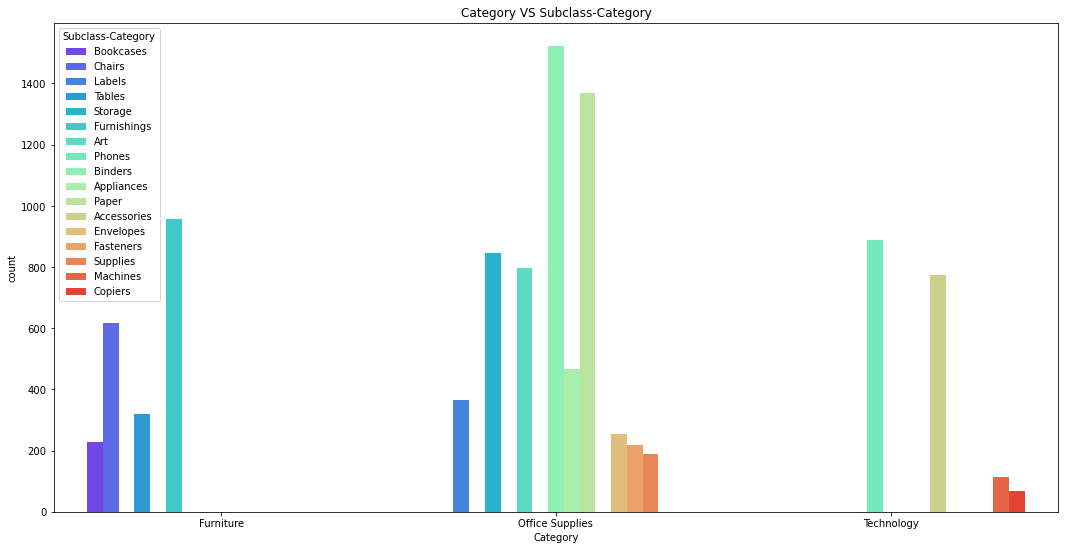

In [47]:
plt.figure(figsize=(18,9))
plt.title('Category VS Subclass-Category')
sns.countplot(x=df['Category'],hue=df['Subclass-Category'],palette='rainbow')
plt.xticks()

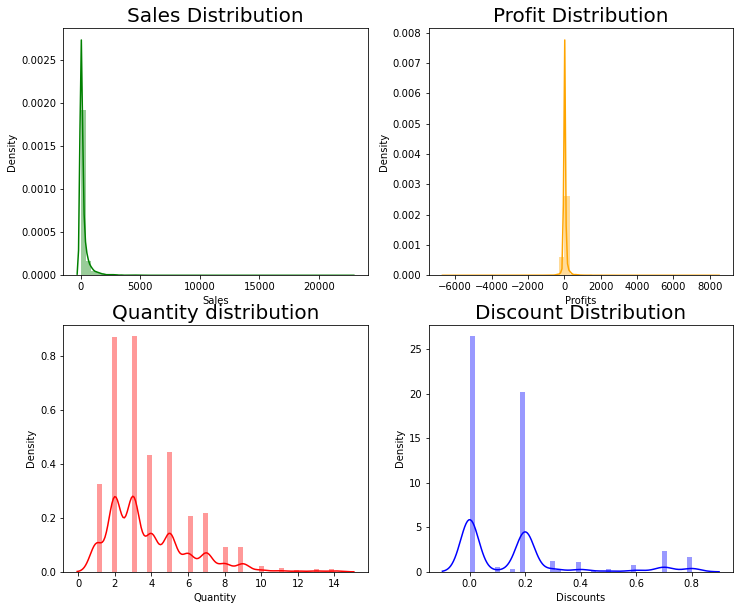

In [48]:
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (12,10))
sns.distplot(df['Sales'], color = 'green',  ax = axs[0][0])
sns.distplot(df['Profits'], color = 'orange',  ax = axs[0][1])
sns.distplot(df['Quantity'], color = 'red',  ax = axs[1][0])
sns.distplot(df['Discounts'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 20)
axs[0][1].set_title('Profit Distribution', fontsize = 20)
axs[1][0].set_title('Quantity distribution', fontsize = 20)
axs[1][1].set_title('Discount Distribution', fontsize = 20)
plt.show()

**Conclusion:**

* Profits and sales are highly correlated.
* In category, Furniture has large no. of sales but instead of making profit, it makes loss. So, there is need to limit the sales of Furniture.
* States like California, NewYork, Washington,Michigan, Indiana, Virginia, Georgia makes good profit. So, sales can be increased in these states.
* States like Texas, Pennsylvania, Ohio and lllinosis has huge sales but it makes big loss. So, there is need to reduce the sales in these states and we have to give some good Discounts,and Great Deals to attract them. We need to work on this state.
* In sub-category Phones have high sales.
